In [1]:
import numpy as np
import matplotlib.pyplot as plt
import polyplotter as pp
from scipy.optimize import curve_fit
from functools import partial

In [20]:
def residuals(f, *args, func=None, data=None):
    return np.abs(data-func(f, *args))**2

def resonator_fit(freqs, data, func, p0, plot=True):
    popt, pcov = curve_fit(partial(residuals, data=data, func=func), freqs, 0*freqs, p0=p0)
    if plot:
        plot_data_fit(freqs, data, func, popt)
    return popt

def plot_data_fit(x, data, fitf, popt):
    plt.figure()
    smooth_x = np.linspace(x[0], x[-1], 10000)
    fit = fitf(smooth_x, *popt)
    fit_pts = fitf(x, *popt)
    f1 = plt.figure()
    ax1 = f1.subplots()
    f2 = plt.figure()
    ax2 = f2.subplots()
    f3 = plt.figure()
    ax3 = f3.subplots()
    axs = (ax1, ax2, ax3)
    plot_complex(x, data, fmt='k.', axs=axs)
    plot_complex(smooth_x, fit, fmt='r--', axs=axs)
    
def plot_complex(x, data, fmt='k.', axs=None, label=None, log=False):
    if axs is None:
        f1 = plt.figure()
        ax1 = f1.subplots()
        f2 = plt.figure()
        ax2 = f2.subplots()
        f3 = plt.figure()
        ax3 = f3.subplots()
    else:
        ax1, ax2, ax3 = axs

    if log:
        ax1.semilogy(x, np.abs(data), fmt, label=label)
    else:
        ax1.plot(x, np.abs(data), fmt, label=label)
    ax2.plot(x, np.unwrap(np.angle(data)), fmt, label=label)
    ax3.plot(np.real(data), np.imag(data), fmt, label=label)
    rough_fres_ind = np.argmin(np.abs(data))
    ax3.plot(np.real(data[rough_fres_ind]), np.imag(data[rough_fres_ind]), 'rx')

In [3]:
freqs = [7.5745e9, 7.5775e9]
smooth_f = np.linspace(freqs[0], freqs[-1], 10000)
params = [7.5765e9, 5000, 0.3]
theory = pp.linear_resonator(smooth_f, *params)

0.9
0.9500000000000001
1.0
1.05
1.1


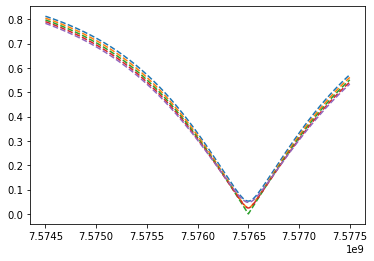

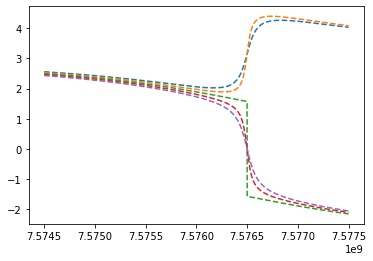

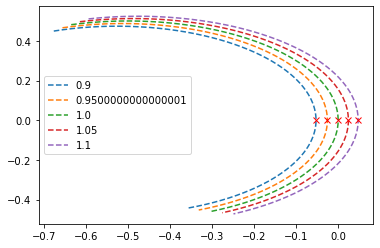

In [30]:
N = 5

f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
fmts = [f'C{i}--' for i in range(N)]
params[2] = 0.01
#plot_complex(smooth_f, pp.linear_resonator(smooth_f, *params), fmt='k--', axs=axs)
for i,beta in enumerate(np.linspace(0.9, 1.1, N)):
    params[2] = beta
    print(beta)
    plot_complex(smooth_f, pp.linear_resonator(smooth_f, *params), fmt=fmts[i], axs=axs,label=beta)
    
plt.legend()

In [6]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230326_Al_z50.txt", complex=True)
freqs = data[0]
s11 = data[1]

../../data/simulated_S11_data/


In [9]:
spec_size=np.where(np.diff(freqs) < -(np.max(freqs)-np.min(freqs))/2)[0][0]+1
fs = freqs.reshape(-1,spec_size)[-3:]
s11s = s11.reshape(-1,spec_size)[-3:]
phases = np.unwrap(np.angle(s11s))[-3:]
lengths = np.linspace(35, 135, fs.size)[-3:]

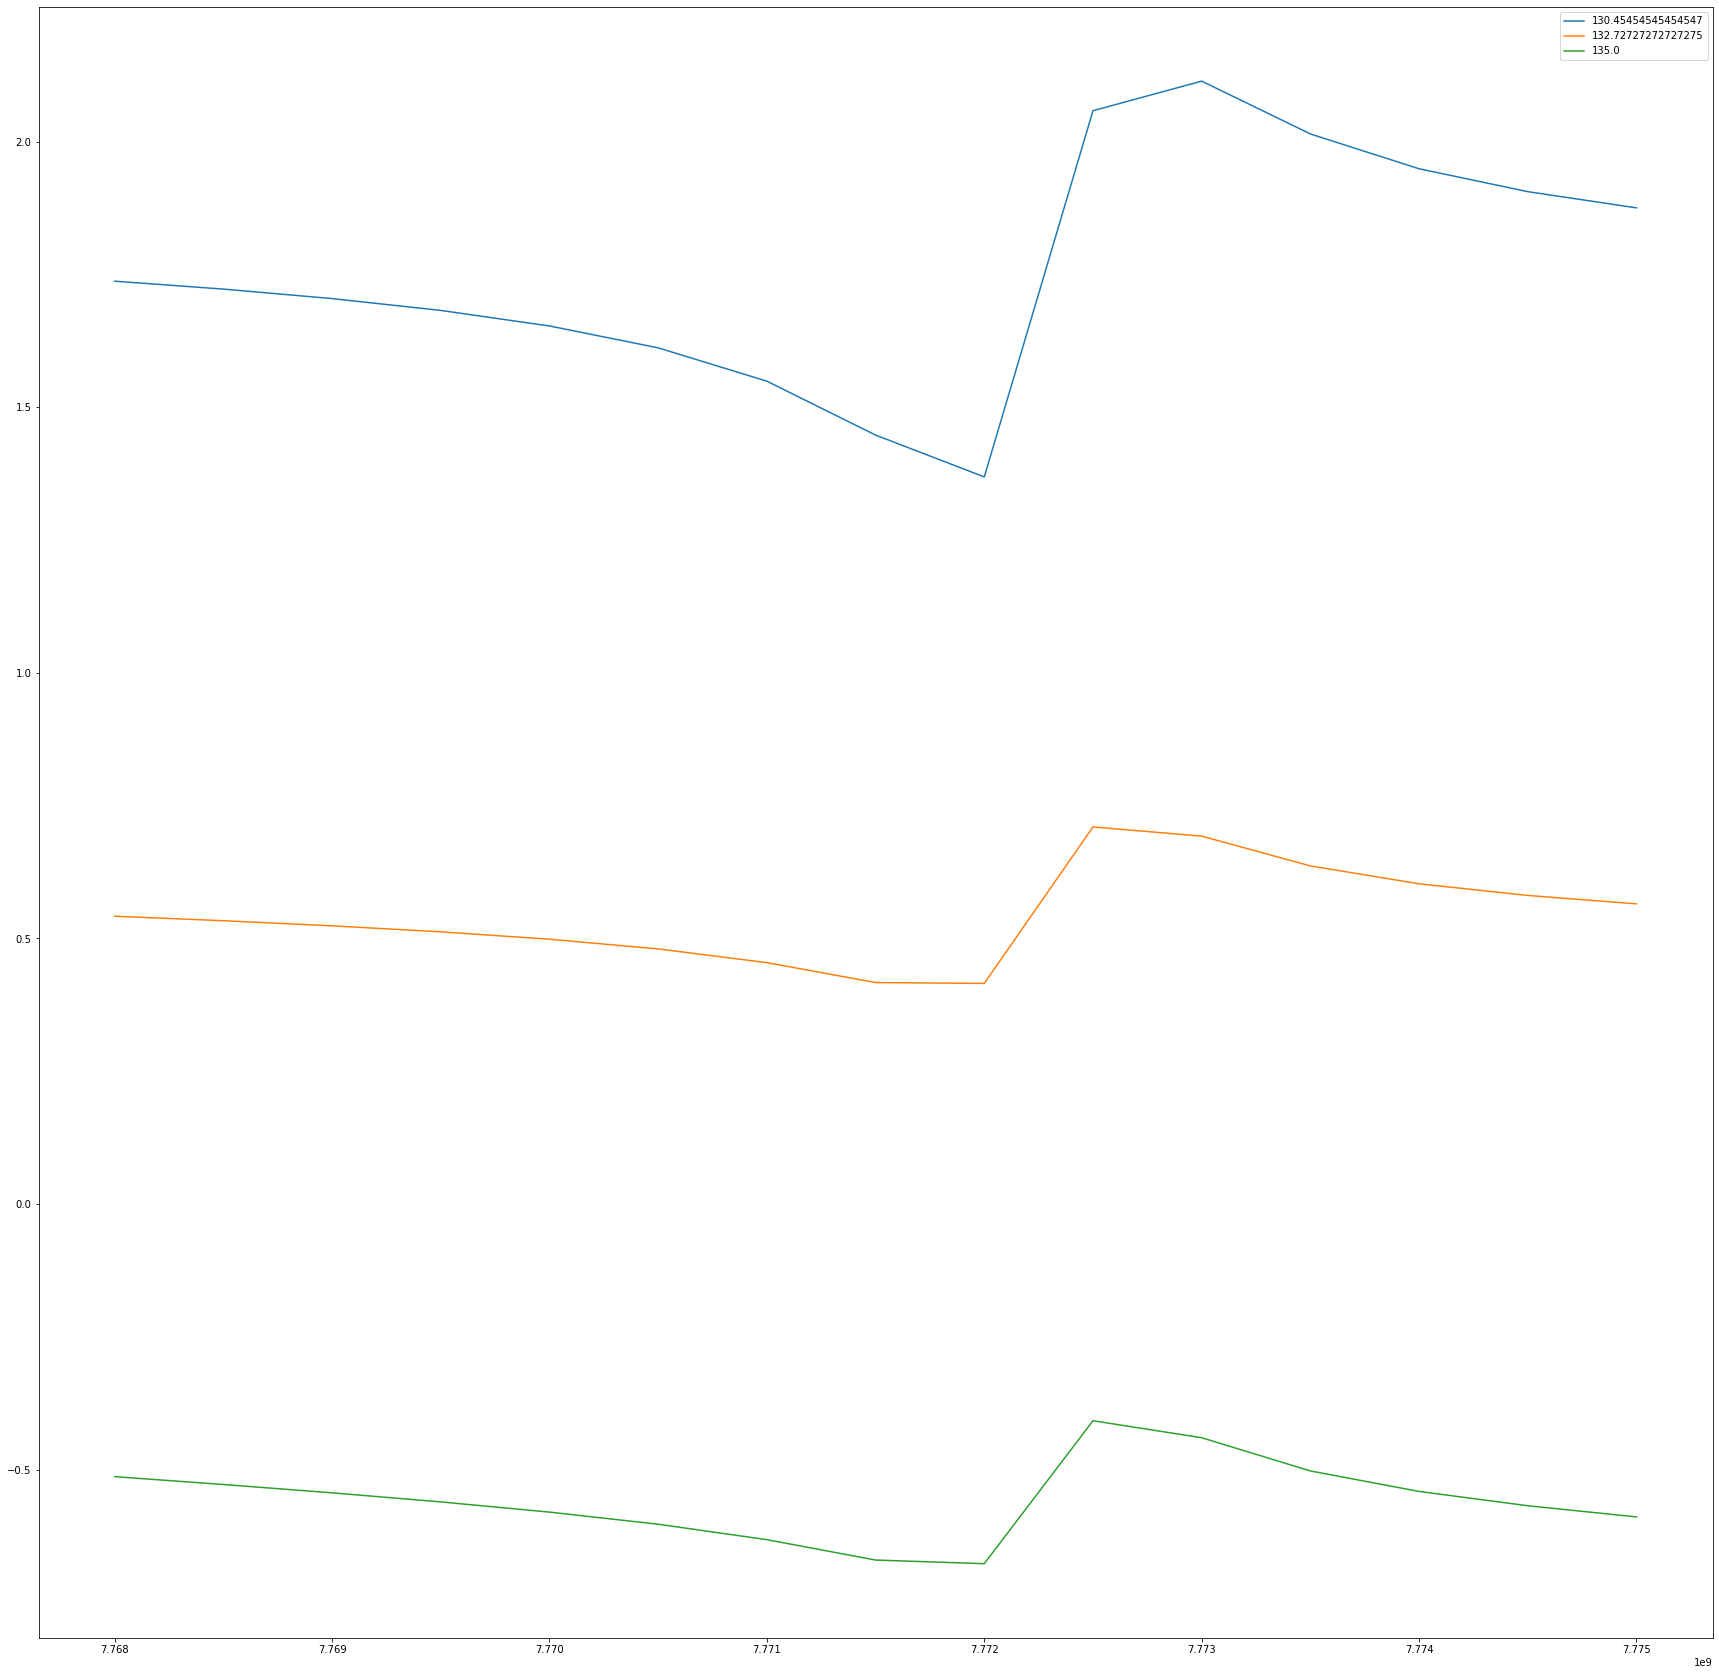

In [10]:
plt.figure(figsize=(30,30))
for i, l in enumerate(lengths):
    plt.plot(fs[i], phases[i], label=l)
plt.legend()

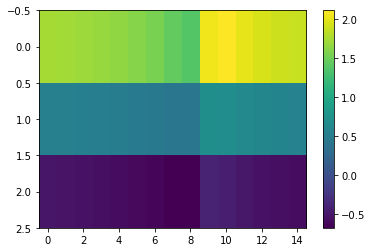

In [11]:
plt.imshow(phases, aspect='auto')
plt.colorbar()

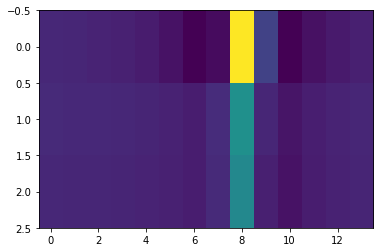

In [12]:
plt.imshow(np.diff(phases,axis=1), aspect='auto')

In [14]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230326_Al_z50.txt", complex=True)
freqs = data[0]
s11 = data[1]

../../data/simulated_S11_data/


In [38]:
spec_size=np.where(np.diff(freqs) < -(np.max(freqs)-np.min(freqs))/2)[0][0]+1
fs = freqs.reshape(-1,spec_size)
s11s = s11.reshape(-1,spec_size)
phases = np.unwrap(np.angle(s11s))
lengths = np.arange(35, 135+5, 5)

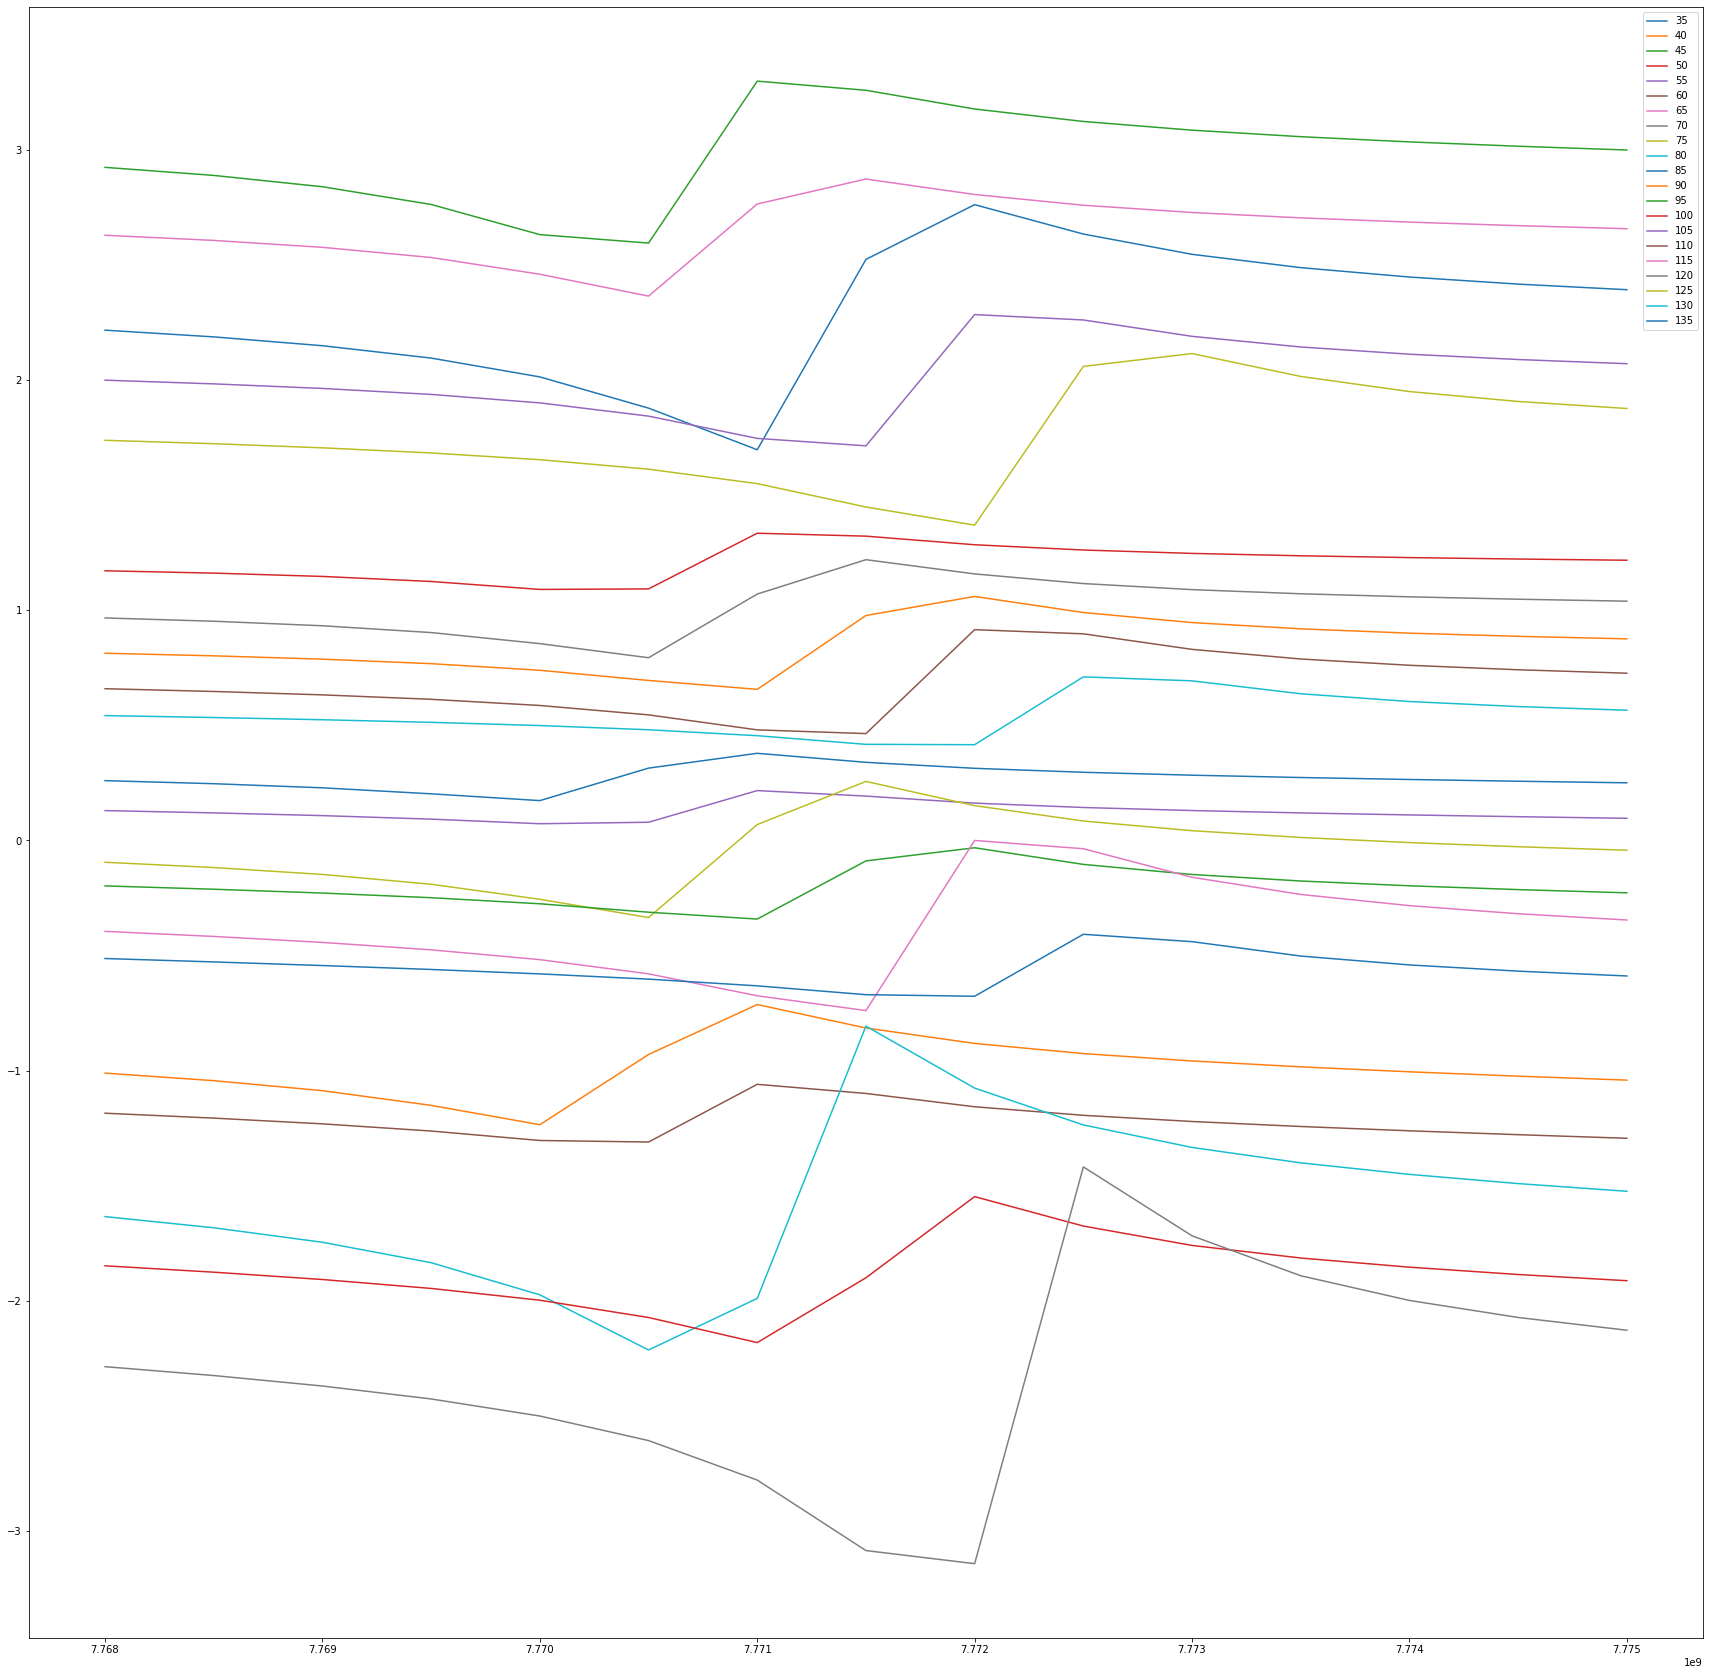

In [39]:
plt.figure(figsize=(30,30))
for i, l in enumerate(lengths):
    plt.plot(fs[i], phases[i], label=l)
plt.legend()

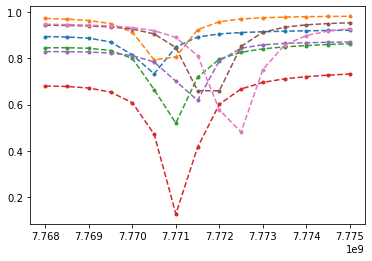

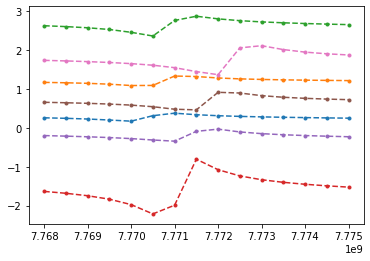

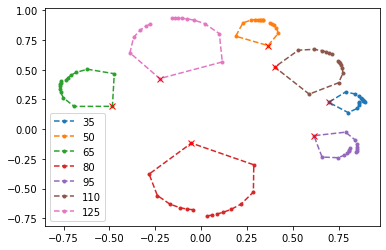

In [40]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
for i in range(0,fs.shape[0],3):
    plot_complex(fs[i], s11s[i], axs=axs, fmt=f'--C{i//3}.', label=lengths[i])
plt.legend()
Q_0 = Q_L*(1 + beta)
beta = Q_0/Q_L - 1

[ 7.77108280e+09  1.02768637e+04  5.62527422e-01 -2.52786706e-01
  1.58588221e+00]


<Figure size 432x288 with 0 Axes>

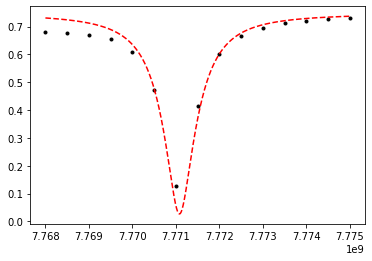

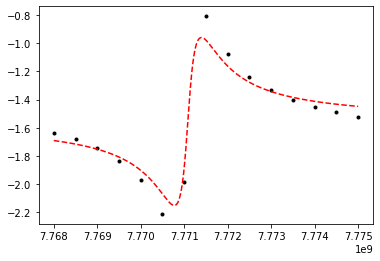

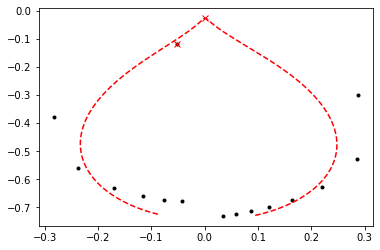

In [46]:
ind = np.argmin(np.abs(lengths-80))
print(resonator_fit(fs[ind], s11s[ind], p0=[7.7715e9, 5000, 0.1, 0.5,0.5], func=pp.linear_resonator_offset))

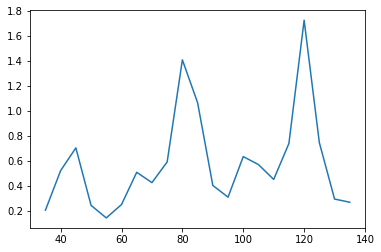

In [42]:
phases.shape
dphases = np.max(phases, axis=1) - np.min(phases, axis=1)
plt.plot(lengths,dphases)

In [3]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230329_Al_z50.txt", complex=True)
freqs = data[0]
s11 = data[1]

../../data/simulated_S11_data/


In [4]:
spec_size=np.where(np.diff(freqs) < -(np.max(freqs)-np.min(freqs))/2)[0][0]+1
fs = freqs.reshape(-1,spec_size)
s11s = s11.reshape(-1,spec_size)
phases = np.unwrap(np.angle(s11s))
lengths = np.arange(30, 90+3, 3)

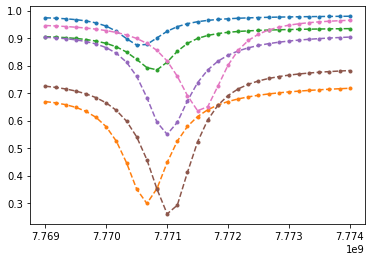

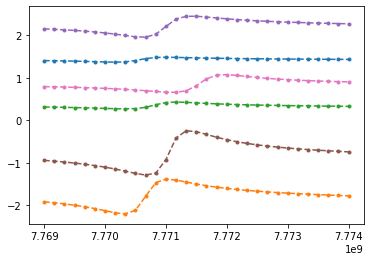

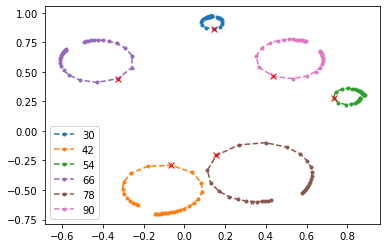

In [17]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
for i in range(0,fs.shape[0],4):
    plot_complex(fs[i], s11s[i], axs=axs, fmt=f'--C{i//3}.', label=lengths[i])
plt.legend()

In [6]:
f0_inds = np.argmin(np.abs(s11s), axis=1)
f0_inds

array([ 9, 10,  9, 10, 10, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12,
       14, 15, 15, 15], dtype=int64)

[7.77126062e+09 9.28469319e+03 4.75307026e-01 1.10950298e+00
 1.29048838e-01 2.65341673e-01]


<Figure size 432x288 with 0 Axes>

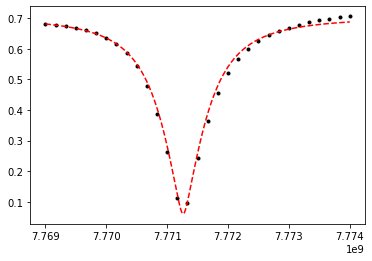

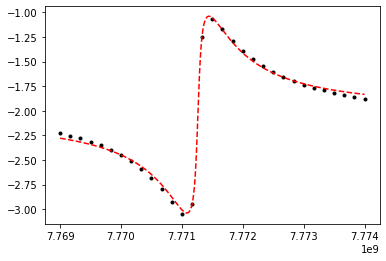

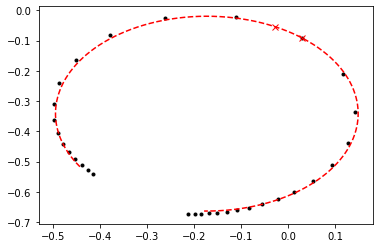

In [10]:
ind = np.argmin(np.abs(lengths-80))
print(resonator_fit(fs[ind], s11s[ind], p0=[7.7715e9, 10000, 0.1, 3, 0,-0.25], func=pp.linear_resonator_rotated_offset))

[7.77097629e+09 1.10737542e+04 6.87810571e-02 2.18574577e+00
 2.12284025e-01 5.39528500e-01]


<Figure size 432x288 with 0 Axes>

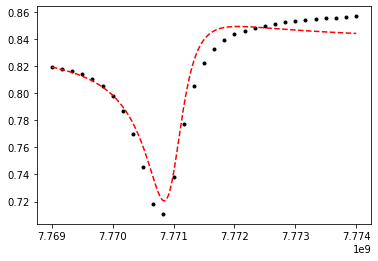

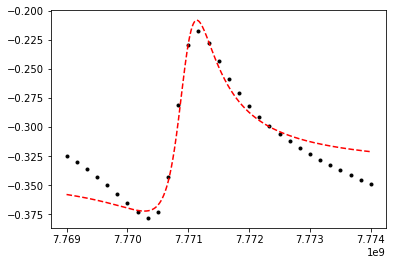

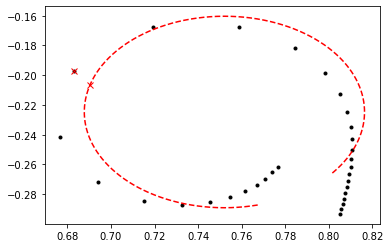

In [16]:
ind = np.argmin(np.abs(lengths-57))
print(resonator_fit(fs[ind], s11s[ind], p0=[7.7715e9, 10000, 0.1, 3, 0.75,-0.25], func=pp.linear_resonator_rotated_offset))

In [6]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230403_Al_z50.txt", complex=True)
freqs = data[0]
s11 = data[1]

../../data/simulated_S11_data/


In [11]:
spec_size=np.where(np.diff(freqs) < -(np.max(freqs)-np.min(freqs))/2)[0][0]+1
fs = freqs.reshape(-1,spec_size)
s11s = s11.reshape(-1,spec_size)
phases = np.angle(s11s)
dl = 0.5 # mm
lengths = np.arange(79, 84+dl, dl)

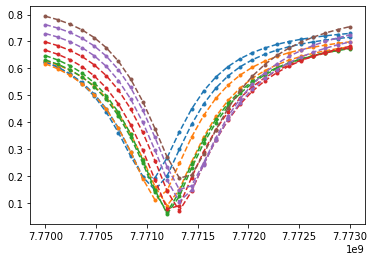

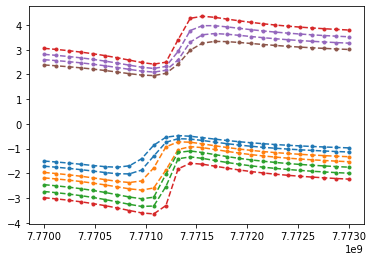

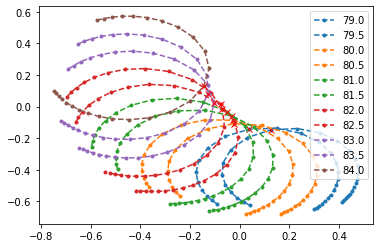

In [12]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
for i in range(0,fs.shape[0]):
    plot_complex(fs[i], s11s[i], axs=axs, fmt=f'--C{i//2}.', label=lengths[i])
plt.legend()

In [29]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230406_Al_z50.txt", complex=True)
freqs = data[0]
s11 = data[1]

../../data/simulated_S11_data/


In [30]:
spec_size=np.where(np.diff(freqs) < -(np.max(freqs)-np.min(freqs))/2)[0][0]+1
fs = freqs.reshape(-1,spec_size)
s11s = s11.reshape(-1,spec_size)
phases = np.angle(s11s)
dl = 5 # mm
lengths = np.arange(30, 90+dl, dl)

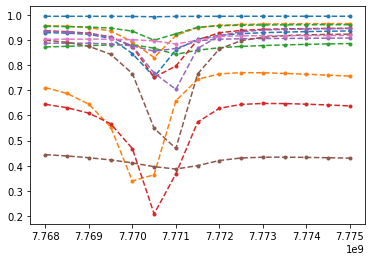

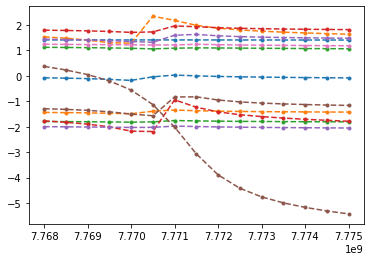

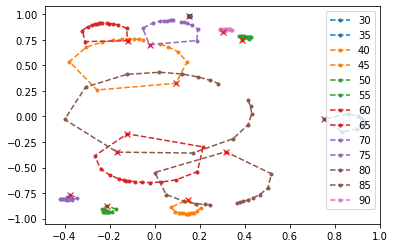

In [31]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
start = 0
for i in range(start,fs.shape[0]):
    plot_complex(fs[i], s11s[i], axs=axs, fmt=f'--C{(i-start)//2}.', label=lengths[i])
plt.legend()

In [16]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230406_Al_near_45_z50.txt", complex=True)
freqs = data[0]
s11 = data[1]

../../data/simulated_S11_data/


In [18]:
spec_size=np.where(np.diff(freqs) < -(np.max(freqs)-np.min(freqs))/2)[0][0]+1
fs = freqs.reshape(-1,spec_size)
s11s = s11.reshape(-1,spec_size)
phases = np.angle(s11s)
dl = 0.5 # mm
lengths = np.arange(44, 46+dl, dl)

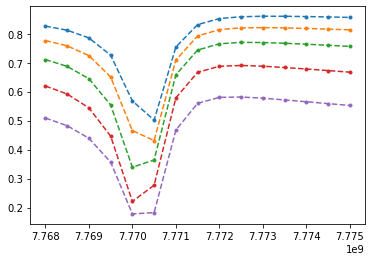

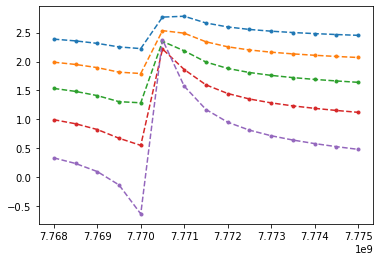

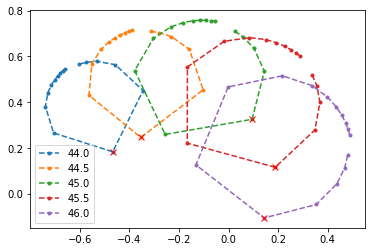

In [19]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
start = 0
for i in range(start,fs.shape[0]):
    plot_complex(fs[i], s11s[i], axs=axs, fmt=f'--C{i-start}.', label=lengths[i])
plt.legend()

[ 7.77058736e+09  9.38576787e+03  4.48361347e-01  3.23496063e+00
 -5.15676226e-01  1.45726391e-01]


<Figure size 432x288 with 0 Axes>

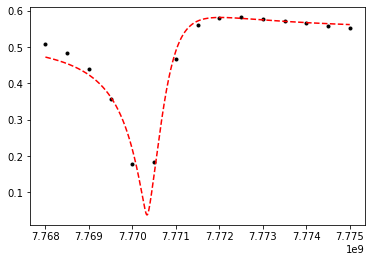

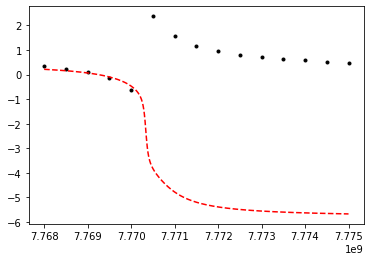

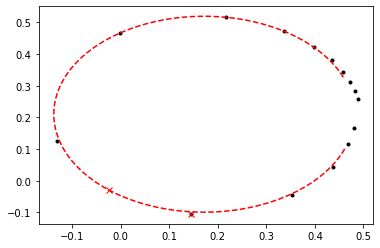

In [27]:
ind = np.argmin(np.abs(lengths-46))
print(resonator_fit(fs[ind], s11s[ind], p0=[7.7715e9, 5000, 0.9, 3, 0.2, 0.2], func=pp.linear_resonator_rotated_offset))

In [ ]:
thf = np.linspace(
th1 = pp.linear_resonator_rotated_offset(

In [19]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230406_Al_near_47_z50.txt", complex=True)
freqs = data[0]
s11 = data[1]

../../data/simulated_S11_data/


In [21]:
spec_size=np.where(np.diff(freqs) < -(np.max(freqs)-np.min(freqs))/2)[0][0]+1
fs = freqs.reshape(-1,spec_size)
s11s = s11.reshape(-1,spec_size)
phases = np.angle(s11s)
dl = 0.5 # mm
lengths = np.arange(46, 48+dl, dl)

5


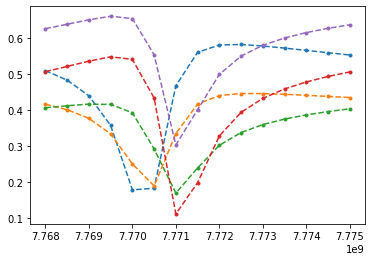

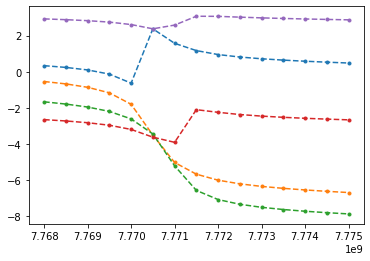

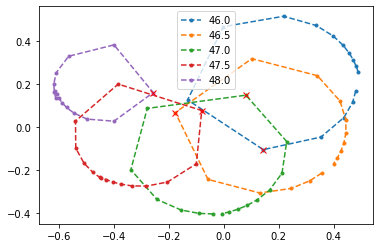

In [23]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
start = 0
end = 0
print(len(lengths) - start - end)
for i in range(start,fs.shape[0]-end):
    plot_complex(fs[i], s11s[i], axs=axs, fmt=f'--C{(i-start)}.', label=lengths[i])
plt.legend()

[ 7.77067457e+09  9.49367619e+03  4.47319063e-01  2.53466824e+00
 -4.34831327e-01  4.01723492e-01]


<Figure size 432x288 with 0 Axes>

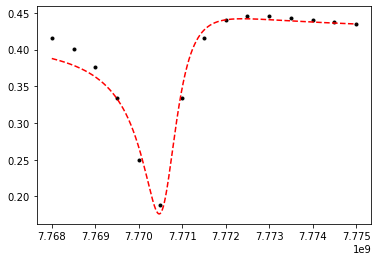

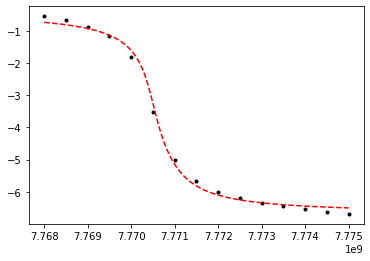

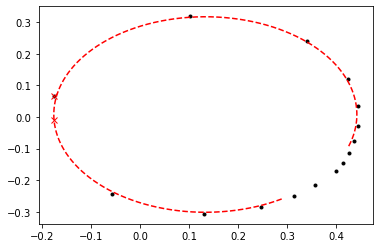

In [26]:
ind = np.argmin(np.abs(lengths-46.5))
print(resonator_fit(fs[ind], s11s[ind], p0=[7.7715e9, 5000, 1.1, 3, 0.2, 0.2], func=pp.linear_resonator_rotated_offset))

In [12]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230410_Al_30_90_step_3_z90.txt", complex=True)
freqs = data[0]
s11 = data[1]

../../data/simulated_S11_data/


In [13]:
spec_size=np.where(np.diff(freqs) < -(np.max(freqs)-np.min(freqs))/2)[0][0]+1
fs = freqs.reshape(-1,spec_size)
s11s = s11.reshape(-1,spec_size)
phases = np.angle(s11s)
dl = 3 # mm
lengths = np.arange(30, 90+dl, dl)

6


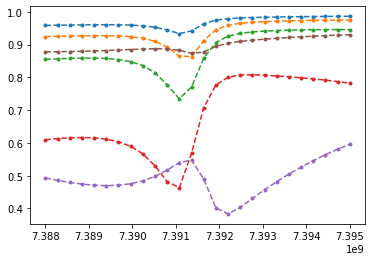

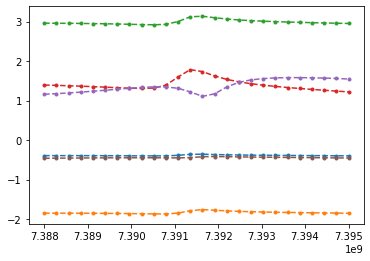

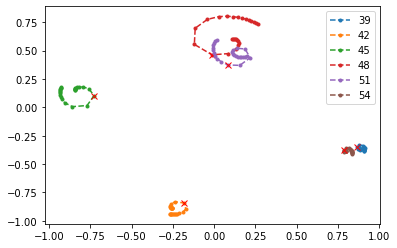

In [14]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
start = 3
end = 12
print(len(lengths) - start - end)
for i in range(start,fs.shape[0]-end):
    plot_complex(fs[i], s11s[i], axs=axs, fmt=f'--C{(i-start)}.', label=lengths[i])
plt.legend()

In [28]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230419_Al_near_49_z90.txt", complex=True)
freqs = data[0]
s11 = data[1]

../../data/simulated_S11_data/


In [29]:
spec_size=np.where(np.diff(freqs) < -(np.max(freqs)-np.min(freqs))/2)[0][0]+1
fs = freqs.reshape(-1,spec_size)
s11s = s11.reshape(-1,spec_size)
phases = np.angle(s11s)
dl = 0.5 # mm
lengths = np.arange(48.5, 51+dl, dl)

6


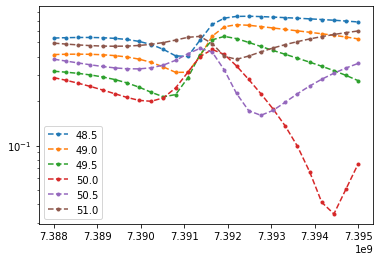

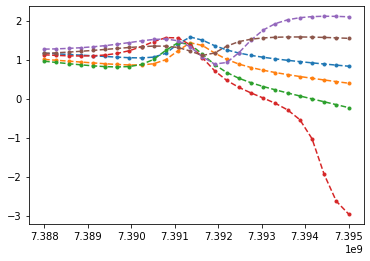

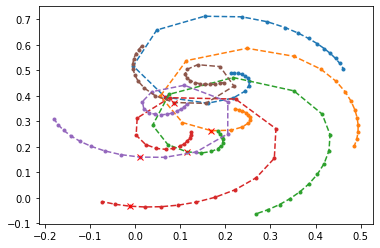

In [30]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
start = 0
end = 0
print(len(lengths) - start - end)
for i in range(start,fs.shape[0]-end):
    plot_complex(fs[i], s11s[i], axs=axs, fmt=f'--C{(i-start)}.', label=lengths[i], log=True)
ax1.legend()

In [27]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230425_Cu_cylinder_coax.txt", complex=True)
freqs = data[0]
s11 = data[1]

../../data/simulated_S11_data/


In [29]:
spec_size=len(s11)
fs = freqs.reshape(-1,spec_size)
s11s = s11.reshape(-1,spec_size)
phases = np.angle(s11s)

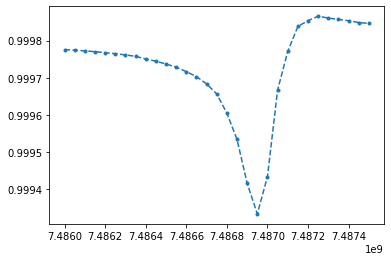

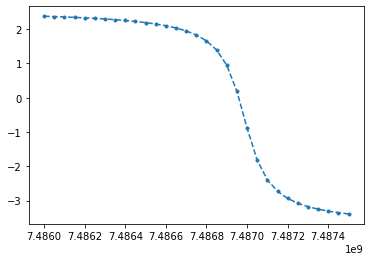

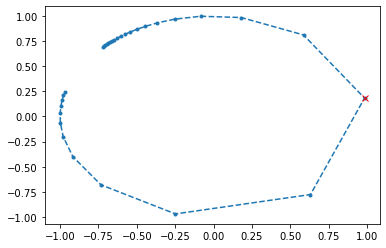

In [31]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
plot_complex(fs[0], s11s[0], axs=axs, fmt='--.')

[ 7.48698645e+09  3.98732999e+07  9.53111933e+02 -5.89314859e-01]


<Figure size 432x288 with 0 Axes>

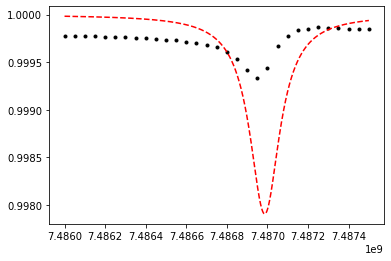

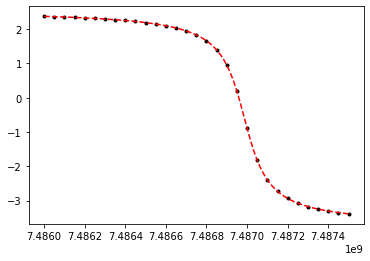

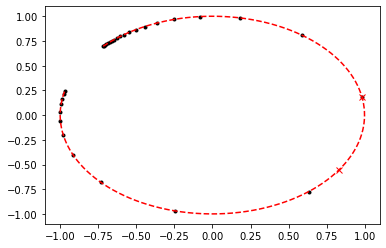

In [48]:
ind = 0
print(resonator_fit(fs[ind], s11s[ind], p0=[7.487e9, 5000, 1,-np.pi/4], func=pp.linear_resonator_rotated))

In [22]:
print(pp.dir_comsol_s11)
data = pp.load_comsol_s11("20230504_Al_near_47_z50_hires.txt", complex=True)
freqs = data[0]
s11 = data[1]

../../data/simulated_S11_data/


In [23]:
spec_size=np.where(np.diff(freqs) < -(np.max(freqs)-np.min(freqs))/2)[0][0]+1
fs = freqs.reshape(-1,spec_size)
s11s = s11.reshape(-1,spec_size)
phases = np.angle(s11s)
dl = 0.2 # mm
lengths = np.arange(46, 48+dl, dl)

12


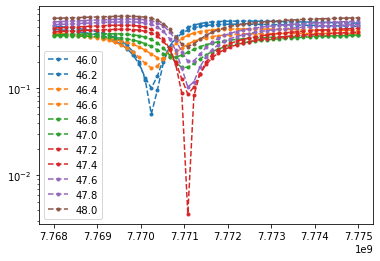

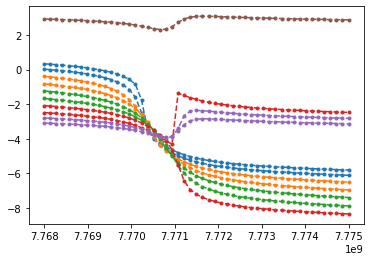

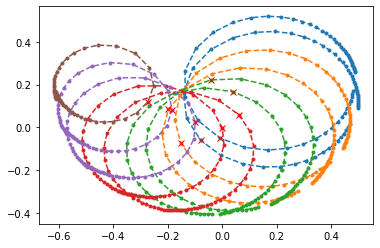

In [26]:
f1 = plt.figure()
ax1 = f1.subplots()
f2 = plt.figure()
ax2 = f2.subplots()
f3 = plt.figure()
ax3 = f3.subplots()
axs = (ax1, ax2, ax3)
start = 0
end = 0
print(len(lengths) - start - end)
for i in range(start,fs.shape[0]-end):
    plot_complex(fs[i], s11s[i], axs=axs, fmt=f'--C{(i-start)//2}.', label=np.round(lengths[i],1), log=True)
ax1.legend()